In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
x = np.load('./csvfiles/mldata/tatanic_X_train.npy')
y = np.load('./csvfiles/mldata/tatanic_y_train.npy')

In [13]:
x = pd.DataFrame(x)

In [14]:
y = pd.DataFrame(y)

In [17]:
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.15, random_state=1) 

In [18]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81        75
         1.0       0.75      0.78      0.77        59

    accuracy                           0.79       134
   macro avg       0.79      0.79      0.79       134
weighted avg       0.79      0.79      0.79       134



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82        75
         1.0       0.79      0.75      0.77        59

    accuracy                           0.80       134
   macro avg       0.80      0.79      0.79       134
weighted avg       0.80      0.80      0.80       134



In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83        75
         1.0       0.85      0.66      0.74        59

    accuracy                           0.80       134
   macro avg       0.81      0.78      0.79       134
weighted avg       0.81      0.80      0.79       134



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [21]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
log_pred = tree.predict(x_test)
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82        75
         1.0       0.79      0.75      0.77        59

    accuracy                           0.80       134
   macro avg       0.80      0.79      0.79       134
weighted avg       0.80      0.80      0.80       134



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=2)
km.fit(x_train)
df = x_train
df['label'] = km.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
df1 = x_train
df1['y'] = y_train

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


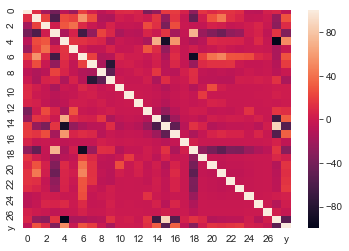

In [34]:
sns.heatmap(df1.corr()*100)

In [39]:
x = np.load('./csvfiles/mldata/tatanic_X_train.npy')
y = np.load('./csvfiles/mldata/tatanic_y_train.npy')

In [40]:
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.2, random_state=77) 

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [45]:
clflog = LogisticRegression(random_state=1)
clfdt = DecisionTreeClassifier(random_state=1)
clfgn = GaussianNB()
eclf_h = VotingClassifier(estimators=[('lr', clflog), ('rf', clfdt), ('gnb', clfgn)], voting='hard')
eclf_s = VotingClassifier(estimators=[('lr', clflog), ('rf', clfdt), ('gnb', clfgn)], voting='soft')

In [46]:
models = [clflog, clfdt, clfgn, eclf_h, eclf_s]

In [48]:
for model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    score = model.score(x_test, y_test)
    print(model)
    print(score)
    print('='*20)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.8707865168539326
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')
0.8314606741573034
GaussianNB(priors=None, var_smoothing=1e-09)
0.7696629213483146
VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
x = np.load('./csvfiles/mldata/tatanic_X_train.npy')
y = np.load('./csvfiles/mldata/tatanic_y_train.npy')

In [56]:
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.2, random_state=77) 

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [58]:
clflog = LogisticRegression(random_state=1)
clfdt = DecisionTreeClassifier(random_state=1)
clfgn = GaussianNB()
eclf_h = VotingClassifier(estimators=[('lr', clflog), ('rf', clfdt), ('gnb', clfgn)], voting='hard')
eclf_s = VotingClassifier(estimators=[('lr', clflog), ('rf', clfdt), ('gnb', clfgn)], voting='soft')
eclf_h1 = VotingClassifier(estimators=[('lr', clflog), ('rf', clfdt)], voting='hard')
eclf_s1 = VotingClassifier(estimators=[('lr', clflog), ('rf', clfdt)], voting='soft')

In [59]:
models = [clflog, clfdt, eclf_h, eclf_s,eclf_h1,eclf_s1]

In [60]:
for model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    score = model.score(x_test, y_test)
    print(model)
    print(score)
    print('='*20)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.8707865168539326
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')
0.8314606741573034
VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                              

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [67]:
eclf_h1 = VotingClassifier(estimators=[('lr', clflog), ('dt', clfdt)], voting='hard')

In [68]:
c_param = [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]
params = {'lr__solver':['liblinear'], 'lr__penalty':['l2'], 'lr__C':c_param,
    'dt__criterion':['gini','entropy'],'dt__max_depth':[10,8,7,6,5,4,3,2],
    'dt__min_samples_leaf':[1,2,3,4,5,6,7,8,9]
}

In [69]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator= eclf_h1, param_grid=params, cv =5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='warn',
                                                                        n_jobs=None,
                                                                        penalty='l2',
              

In [70]:
grid.best_score_

0.8368495077355836

In [71]:
grid.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 6,
 'dt__min_samples_leaf': 6,
 'lr__C': 5.0,
 'lr__penalty': 'l2',
 'lr__solver': 'liblinear'}

In [72]:
print(classification_report(y_test, grid.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87        97
         1.0       0.92      0.72      0.81        81

    accuracy                           0.84       178
   macro avg       0.86      0.83      0.84       178
weighted avg       0.85      0.84      0.84       178

